# Buenas practicas - Escribiendo funciones

Apunte del curso de Datacamp writing-functions-in-python (https://learn.datacamp.com/courses/writing-functions-in-python)

## 1 - Buenas practicas

### 1.1- Docstring

Los docstring son para que el código que se escribe sea más entedible para otros usuarios, lo primordial es que incluya una descripción de lo que hace la función.

Usalmente pueden incluir los siguientes elementos:
    - Descripción de lo que hace la función
    - Descripción de los argumentos de la función (si es que tiene)
    - Descripción del valor que retorna la función (si es que tiene)
    - Descripción de los errores que levanta la función (si es que tiene)
    - Notas opcionales o ejemplos

Existen varios formatos de Docstring, sin embargo, aca usaré el de numpy

Creemos una función que elimina duplicados, ordena el dataframe y luego resetea el indice, todo en función de una columna.

In [9]:
def new_order(df, column_name):
    '''
    Set a new order in the daframe without duplicates.
    First it deletes duplicates for a column, then sort
    the dataframe ascending whit this column, and finally
    set a new order index.
    
    Parameters
    ----------
    df: DataFrame
        the dataframe we want to order
    column_name: str
        the name of the column we want to sort
    
    Returns
    -------
    Dataframe
        the resulting dataframe
        
    '''
    new_df = df.drop_duplicates(subset=[column_name])
    new_df.sort_values(by=column_name, inplace=True)
    new_df.reset_index(inplace=True, drop=True)

    return new_df

Podemos acceder al docstring de la función de la siguente forma usando la consola:

In [10]:
print(new_order.__doc__)


    Set a new order in the daframe without duplicates.
    First it deletes duplicates for a column, then sort
    the dataframe ascending whit this column, and finally
    set a new order index.
    
    Parameters
    ----------
    df: DataFrame
        the dataframe we want to order
    column_name: str
        the name of the column we want to sort
    
    Returns
    -------
    Dataframe
        the resulting dataframe
        
    


Aunque para evitar que tenga ese formato, podemos usar el modulo inspect

In [11]:
import inspect

print(inspect.getdoc(new_order))

Set a new order in the daframe without duplicates.
First it deletes duplicates for a column, then sort
the dataframe ascending whit this column, and finally
set a new order index.

Parameters
----------
df: DataFrame
    the dataframe we want to order
column_name: str
    the name of the column we want to sort

Returns
-------
Dataframe
    the resulting dataframe
    


### 1.2- No te repitas a ti mismo

Si varios grupos de lineas de código hace lo mismo es momento de crear una función

Supongamos quiero crear 3 dataframe con valores aleatorios para un rango de fechas. La mala forma seria asi:

In [24]:
import pandas as pd
from random import randint

df_1= pd.DataFrame(pd.date_range(start='2018-04-24',
                                 end='2018-04-27', periods=200),
                   columns=["Date"])
df_1['value'] = [randint(0, 10) for i in range(len(df_1))]

df_2= pd.DataFrame(pd.date_range(start='2019-04-24',
                                 end='2019-04-27', periods=100),
                   columns=["Date"])
df_2['value'] = [randint(0, 10) for i in range(len(df_2))]

df_3= pd.DataFrame(pd.date_range(start='2020-04-24',
                                 end='2020-04-27', periods=300),
                   columns=["Date"])
df_3['value'] = [randint(0, 10) for i in range(len(df_3))]

Sin embargo, mucho codigo se reutiliza, por lo que en su lugar, podemos escribir una función de la siguiente forma

In [25]:
def random_timeserie_df(start_date, end_date, periods, random_tuple):
    '''
    Creates a dataframe with a column in datetime format and
    a random column in int format
    
    Parameters
    ----------
    start_date: str
        The first date in the dataframe
    end_date: str
        The last date in the dataframe
    periods: int
        The number of dates in the dataframe (the len of the dataframe)
    random_tuple: tuple
        The min and max value of random values

    Returns
    -------
    Dataframe
        the resulting dataframe
        
    '''
    df= pd.DataFrame(pd.date_range(start=start_date,
                                   end=end_date, periods=periods),
                     columns=["Date"])
    df['value'] = [randint(random_tuple[0], random_tuple[1]) for i in range(len(df))]
    
    return df
    

Ahora los mismos dataframe se generan de la siguiente forma:

In [26]:
df_1 = random_timeserie_df('2018-04-24', '2018-04-27', 200, (0, 10))
df_2 = random_timeserie_df('2019-04-24', '2019-04-27', 100, (0, 10))
df_3 = random_timeserie_df('2020-04-24', '2020-04-27', 300, (0, 10))

 ### 1.3- Haz solo una cosa

Una buena practica es que las funciones hagan solo una cosa, si la funcion puede dividirse en etapas, mejor dividirla en varias funciones

Por ejemplo, si quiesieramos que la funcion anterior ademas graficara los datos estariamos incumpliendo la regla, porque además de crearlos tendría q graficarlos. En su lugar, podemo agregar otra funcion que lo haga.

In [37]:
import matplotlib.pyplot as plt


def plot_data(df):
    '''
    Plot data
    '''
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df['Date'], df['value'])
    plt.show()

Ahora en la ejecución invocamos a ambas funciones

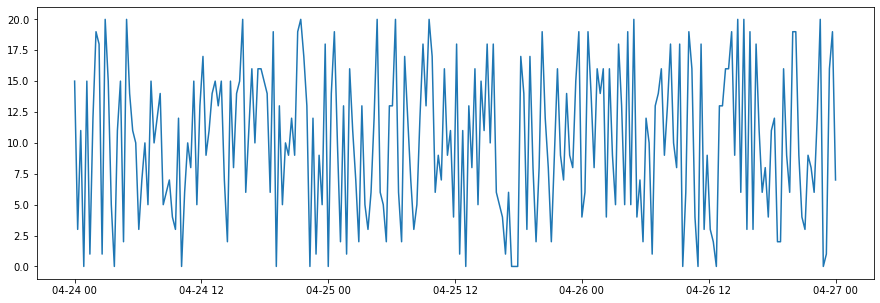

In [42]:
df_4 = random_timeserie_df('2021-04-24', '2021-04-27', 250, (0, 20))
plot_data(df_4)

### 1.4 Pasando argumentos

Si creamos una función de esta forma

In [2]:
def foo(x):
    x[0] = 99
    
my_list = [1, 2, 3]
foo(my_list)
print(my_list)

[99, 2, 3]


Las listas son objetos que pueden cambiar

In [3]:
def bar(x):
    x = x + 90

my_var = 3
bar(my_var)
print(my_var)

3


Los enteros son objetos inmutables, es decir, no pueden cambiar

La única forma de saber si algo es mutable o inmutables, es encontrando una función o método que sea capaz de cambiarlo sin asignarlo a una nueva variable.

Lista de inmutables:
 - int
 - float
 - bool
 - string
 - bytes
 - tuple
 - frozenset
 - None

Practicamente todo lo demás es mutable

Si queremos usar valores por defecto que sean mutables, es mejor, indicarlos como None y crearlos en la propia función. Vease el ejemplo a continuación:

In [7]:
def foo(x=[]):
    x.append(0)
    return x

foo()

[0]

In [8]:
foo()

[0, 0]

En el segundo llamado a la función el valor por defecto ya ha sido modificado. Para que eso no suceda, es mejor escribir la función de la siguiente forma

In [12]:
def foo(x=None):
    if x is None:
        x = []
    x.append(0)
    return x

foo()

[0]

In [13]:
foo()

[0]

## 2- Context Managers

Son un tipo de función que fija un contexto en el que se ejecuta el codigo y luego de eso remueve el contexto

La función open() es un context manager

In [4]:
with open("test_file.txt", "r") as file:
    print(file.read())

Hello World!


Todos los context manager parte con un with

### 2.1- Creando context managers

Hay dos formas de definir un context manager:
    - Usando una clase que tenga los métodos __enter__() y __exit__()
    - Con ciertas funciones

Para crear un context manager con funciones se debe:
    - 1- Definir la función
    - 2- Agregar el codigo que se necesite (opcional)
    - 3- Agregar *yield*
    - 4- Luego de "yield" se puede agregar lo que se necesite con tal de eliminar el contexto
    - 5- Se debe agregar el decorador @contextlib.contextmanager

Agregar yield a la función es una forma de indicar que a pesar de que vas a retornar un valor, quieres que la función continue hasta terminar en algun punto en el futuro

In [7]:
from contextlib import contextmanager

@contextmanager
def my_context():
    print("hello")
    yield "here I am"
    print("still alive")

with my_context() as test:
    print(test)

hello
here I am
still alive


### 2.2 Context managers anidados

Podemos abrir dos contextos diferentes uno dentro de otro. Por ejemplo, si necesitamos copiar un archivo dentro de otro, lo podemos lograr de la siguiente forma:

In [2]:
def copy(src, dest):
    """
    Copy the contents of one file to another.
    
    Parameters
    ----------
    src: str
        Filename of the file to be copied
    dest: str
        Where to write the new file.
    """
    # Open both files
    with open(src, "r") as file_src:
        with open(dest, "w") as file_dts:
            for line in file_src:
                file_dts.write(line)

# Copy file                
copy("test_file.txt", "test_file2.txt")
# Read new file
with open("test_file2.txt", "r") as file:
    print(file.read())

Hello World!


### 2.3- Handling errors

Para manejar los errores podemos utilizar un try block, con esto podemos capturar el error e incluso agregar un bloque final (finally) que se ejecutará si es que nada de lo anterior funcionó.

¿Qué pasa en el caso de que la función falla antes del yield statement y necesitamos que de igual forma termine la ejecución? 

Imaginemos queremos enviar un nuevo registro a un set de datos, pero sino funciona, de todas formas queremos dejar el registro de manera local.

Creamos una función que trata de agregar el registro (va a fallar porque la función que invocará no esta definida) y de todas formas agregaráa los registros en otro archivo de texto.

In [8]:
def send_data(user, action):
    """
    Send data to register.
    
    Parameters
    ----------
    user: str
        Username
    action: str
        Action performed by the user
    """
    try:
        add_register(user, action)
    except NameError:
        print("function not defined")
    # it will run even if the above is successful or not
    finally:
        with open("test_file.txt", "a") as file:
            file.write(f"\n{user}, {action}")

send_data('pamela', 'test1')            
send_data('pamela', 'test2')            
send_data('pamela', 'test3')            

with open("test_file.txt", "r") as file:
    print(file.read())

function not defined
function not defined
function not defined

pamela, test1
pamela, test2
pamela, test3
